# Сверточная сеть в Keras

На лекции мы узнали, что свертки можно комбинировать, применяя друг за другом. Это увеличивает их рецептивное поле и позволяет выучить более сложные признаки.

В этом уроке мы с вами обучим нашу первую свертоную нейронную сеть для задачи классификации одежды. Вот как будет выглядеть наш датасет

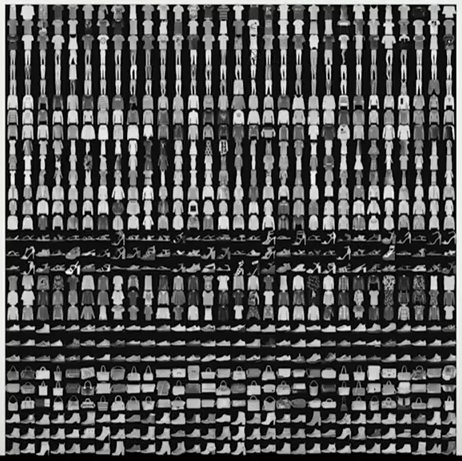

Он называется FashionMnist. Название не случайно похоже на Mnist -- с рукописными цифрами -- FashionMnist придумали как замену Mnist, потому что он стал уж слишком простым для современных нейронных сетей. Как вы помните, на нем мы без труда достигли 97-98% точности.

** перед тем как начать выполнять код мы изменим Runtime на Runtime c GPU. В этом модуле это просто необходимо для ускорения работы*

In [1]:
import tensorflow as tf
print(tf.__version__)
# tf.enable_eager_execution() 
import matplotlib.pyplot as plt

# tf.debugging.set_log_device_placement(True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


2024-05-03 09:49:57.407443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-03 09:49:58.245580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1
Num GPUs Available:  1


2024-05-03 09:49:59.546509: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 09:49:59.582874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 09:49:59.583140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [2]:
mapping = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress",
           4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag",
           9: "Ankle boot"}  # датасет содержит 10 классов

def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {mapping[labels[i]]}. Pred: {mapping[predicted_labels[i]]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {mapping[labels[i]]}")

(60000, 28, 28) (10000, 28, 28)


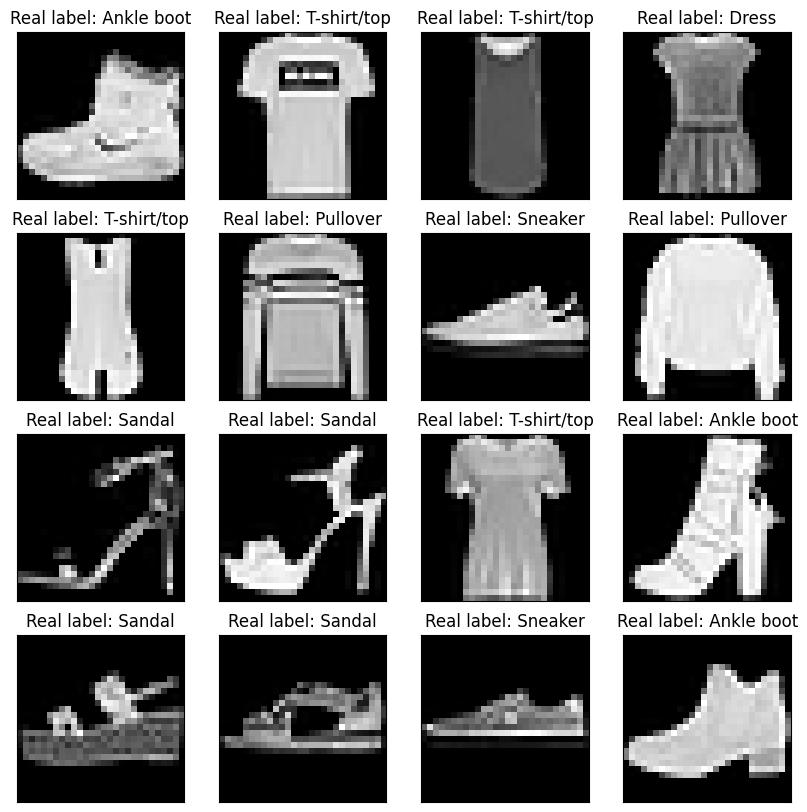

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
print(x_train.shape, x_test.shape)

Для начала попробуем обучить на новом датасете полносвязную сеть. В точности такую же как мы обучали ранее.

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=x_train, y=y_train,
          batch_size=128, epochs=15,
          validation_data=(x_test, y_test))

/mnt/500_gb/data_science/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-05-03 09:50:19.617738: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 09:50:19.618106: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-03 09:5

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


I0000 00:00:1714719020.625332    6512 service.cc:145] XLA service 0x71bca0003320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714719020.625359    6512 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-05-03 09:50:20.652586: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-03 09:50:20.746350: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


164/469 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.7044 - loss: 0.8491

I0000 00:00:1714719021.144152    6512 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7711 - loss: 0.6551 - val_accuracy: 0.8431 - val_loss: 0.4435
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8602 - loss: 0.3899 - val_accuracy: 0.8603 - val_loss: 0.3815
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step - accuracy: 0.8796 - loss: 0.3331 - val_accuracy: 0.8706 - val_loss: 0.3618
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8902 - loss: 0.3060 - val_accuracy: 0.8752 - val_loss: 0.3407
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8917 - loss: 0.2913 - val_accuracy: 0.8730 - val_loss: 0.3517
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8987 - loss: 0.2712 - val_accuracy: 0.8819 - val_loss: 0.3300
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.9069 - loss: 0.2567 - val_accuracy: 0.8833 - val_loss: 0.3286
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.9085 - loss: 0.2466 - val_accuracy:

Мы смогли достичь точности только около 88%. Сможем ли мы лучше с помощью сверточной нейронной сети? Давайте попробуем.

In [5]:
# помним, что для работы со сверточной сетью нам нужны 4х мерные тензоры -- меняем размеры
x_train = x_train[..., None]
x_test = x_test[..., None]
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Мы построим архитектуру по следующим правилам:
*   Будем использовать сверточные слои 3 на 3 с активацией ReLU
*   За сверткой будет следовать слой MaxPool
*   Количество фильтров при уменьшении тензора в два раза (т.е. после MaxPool)будем увеличивать в два раза



In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                                 activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
# т.к. мы используем padding='same', значит, после двух пулингов размер уменьшится ровно в два раза.
# можем это увидеть на summary
model.summary()

/mnt/500_gb/data_science/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

Мы получили тензор размера (7,7,64). Как же мы можем превратить его в классы? Очень просто! Мы уже умеем это делать для полносвязных сетей. Давайте и здесь применем полносвязные слои, чтобы предсказать 10 классов.

Только перед тем как мы применем полносвязный слой -- мы должны "вытянуть" то, что мы ему подаем в строчку, ведь он ожидает вектор а не многомерный тензор.

Воспользуемся **tf.keras.layers.Flatten()**.

In [7]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,234 (860.29 KB)

 Trainable params: 220,234 (860.29 KB)

 Non-trainable params: 0 (0.00 B)

Обратите внимание на количество параметров -- почти в два раза меньше, чем для полносвязной сети.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(x=x_train, y=y_train,
          batch_size=128, epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7394 - loss: 0.7441 - val_accuracy: 0.8654 - val_loss: 0.3780
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8798 - loss: 0.3339 - val_accuracy: 0.8869 - val_loss: 0.3134
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2833 - val_accuracy: 0.8949 - val_loss: 0.2848
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9093 - loss: 0.2533 - val_accuracy: 0.9034 - val_loss: 0.2697
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9182 - loss: 0.2245 - val_accuracy: 0.9091 - val_loss: 0.2576
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9268 - loss: 0.2027 - val_accuracy: 0.9055 - val_loss: 0.2595
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9312 - loss: 0.1871 - val_accuracy: 0.9130 - val_loss: 0.2424
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9367 - loss: 0.1714 - val_accuracy: 0.

Мы получили точность около 91%, что уже лучше, чем точность полносвязной сети для этой же задачи. При этом том, в нашей сети почти в два раза меньше параметров. Мы можем еще увеличить точность немного изменив архитектуру:

In [10]:
# обратите внимание, сейчас перед пуллингом используется два светочных слоя
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                                 activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same',
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,410 (1.02 MB)

 Trainable params: 266,410 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.fit(x=x_train, y=y_train,
          batch_size=128, epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7523 - loss: 0.7107 - val_accuracy: 0.8739 - val_loss: 0.3522
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8946 - loss: 0.2934 - val_accuracy: 0.8944 - val_loss: 0.2911
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9122 - loss: 0.2414 - val_accuracy: 0.9113 - val_loss: 0.2499
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9268 - loss: 0.2012 - val_accuracy: 0.9148 - val_loss: 0.2362
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9362 - loss: 0.1749 - val_accuracy: 0.9196 - val_loss: 0.2240
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9455 - loss: 0.1465 - val_accuracy: 0.9198 - val_loss: 0.2151
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9526 - loss: 0.1287 - val_accuracy: 0.9202 - val_loss: 0.2250
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9603 - loss: 0.1081 - val_accuracy: 0.

Как выбрать архитектуру? Как мы обсуждали ранее -- однозначного ответа на этот вопрос нет. Всегда нужно эксперементировать и только так узнавать что лучше подойдет для конкретной задаче. Но через пару уроков мы узнаем про архитектуры, которые уже придумали и продумали за нас и их можно использовать почти без изменений.

# Заключение

В этом уроке мы обучили свою первую сверточную нейронную сеть. Мы увидели, что благодаря Keras делать это очень просто.

Также мы убедились в том, что такая архитектура больше подходит для изображений. И позволяет достичь бОльшей точности при меньшем количестве параметров.

В следующем практическом задании вы научите сеть классифицировать реальные фотографии кошек и собак. Но перед этим мы немного подготовимся к работе с реальными изображениями в следующем уроке.
